<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Quiz 2

This notebook contains 5 parts. You are to fill in this quiz with your answers, taking special care to follow the directions _exactly_.

To **submit** your quiz, add it to your submissions folder and submit via Google Classroom as any other assignment.

### Quiz Information:
- This is an "open book" quiz - you may use any resources! This includes Jupyter notebooks, Google, StackOverflow, and your notes. ANY RESOURCE YOU USE MUST BE CITED (comment your code with links, which lesson you got the inspiration from, etc.) and failure to cite resources you use will be considered plagiarism. 
- You may NOT work with anyone else on this quiz (your classmates, your instructor, etc.).
- You will have one hour to take this quiz.

## Part 1: Getting the data
The dataset provided in this repository (`./data/concrete.csv`) consists of various amounts of different components used to create concrete and the concrete's [compressive strength](https://www.aboutcivil.org/compressive-strength-of-concrete.html). A data dictionary for this dataset can be found in the README.

**Read in the data and display the first 5 rows.**

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
conc = pd.read_csv('./data/concrete.csv')
conc.head()

,Unnamed: 0,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,2,332.5,142.5,0.0,228.0,NaN,932.0,594.0,270,40.27
3,3,332.5,142.5,0.0,228.0,NaN,932.0,594.0,365,41.05
4,4,198.6,132.4,0.0,192.0,NaN,978.4,825.5,360,44.30


## Part 2: Data Cleaning

There are a few issues with this dataset. To help you identify and fix these issues, you are told:
- The `Unnamed: 0` column should not be a part of this dataset.
- Any null values in this datset are clerical errors. They should all be 0's.
- All columns in this dataset should be numeric.

**Please clean up the dataset.**

In [85]:
conc.drop(columns='Unnamed: 0', inplace=True)

In [86]:
conc.isna().sum()

Cement                             0
Blast Furnace Slag                 0
Fly Ash                            0
Water                              0
Superplasticizer                 379
Coarse Aggregate                   0
Fine Aggregate                     0
Age                                0
Concrete compressive strength      0
dtype: int64

In [87]:
conc.fillna(0, inplace=True)

In [88]:
conc.isna().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [89]:
conc.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                               object
Concrete compressive strength    float64
dtype: object

In [90]:
conc['Age'].value_counts()

28      424
3       134
7       126
56       91
14       62
90       54
100      52
180      26
91       22
365      14
270      13
360       6
120       3
1         2
'28'      1
Name: Age, dtype: int64

In [91]:
conc['Age'] = conc['Age'].map(lambda x: 28 if x == "'28'" else x)

In [92]:
conc['Age'] = conc['Age'].astype(int)
conc.dtypes


Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                                int64
Concrete compressive strength    float64
dtype: object

## Part 3: EDA

You are asked to give the following to the hiring manager:
- Descriptive statistics of the Water column
- A scatterplot of Coarse Aggregate compared to Fine Aggregate colored purple with a title and axis labels

**Please display these.**

In [93]:
conc['Water'].describe()

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: Water, dtype: float64

''

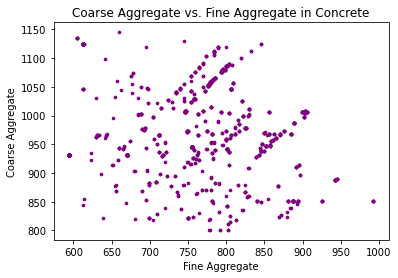

In [94]:
plt.scatter(conc['Fine Aggregate'], conc['Coarse Aggregate'], c='purple', s=7)
plt.title('Coarse Aggregate vs. Fine Aggregate in Concrete')
plt.xlabel('Fine Aggregate')
plt.ylabel('Coarse Aggregate')
;

### Part 4: Initial Findings

Based on an exploration of your data, what do you believe are important contributors to concrete's compressive strength? Write your answer using complete sentences and reference any summary statistics or visualizations necessary.

By reviewing the correlations matrix of our data we can identify columns with correlations to the "Concrete compressive strength" column that are closest to "1" or "-1". These highly correlated columns should be the most important contributors to compressive strength in our data.

In [95]:
conc.corr()['Concrete compressive strength'].sort_values(ascending=False)

Concrete compressive strength    1.000000
Cement                           0.497832
Superplasticizer                 0.366079
Age                              0.328873
Blast Furnace Slag               0.134829
Fly Ash                         -0.105755
Coarse Aggregate                -0.164935
Fine Aggregate                  -0.167241
Water                           -0.289633
Name: Concrete compressive strength, dtype: float64

It appears the most highly positively correlated features are "Cement" with a correlation of 0.497832, followed by "Superplasticizer" with a correlation of 0.366079 and "Age" with a 0.328873 correlation. On the other hand, "Water", with a correlation of -0.289633 is negatively correlated with compressive strength and as so, is also an important contributor to this feature.

Let us review the scatter plots for Concrete compressive strength vs Cement, Superplasticizer and Water to appreciate their linear relationships.

''

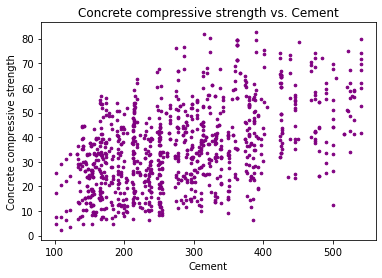

In [96]:
plt.scatter(conc['Cement'], conc['Concrete compressive strength'], c='purple', s=7)
plt.title('Concrete compressive strength vs. Cement')
plt.xlabel('Cement')
plt.ylabel('Concrete compressive strength')
;

''

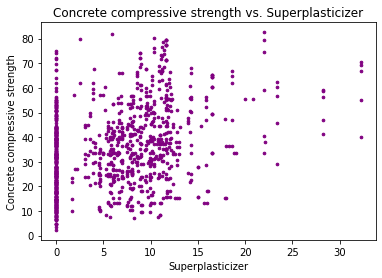

In [97]:
plt.scatter(conc['Superplasticizer'], conc['Concrete compressive strength'], c='purple', s=7)
plt.title('Concrete compressive strength vs. Superplasticizer')
plt.xlabel('Superplasticizer')
plt.ylabel('Concrete compressive strength')
;

This chart of Concrete compressive strength vs. Superplasticizer shows a high prevalence of 0 values for superplasticizer which may be skewing our results.

''

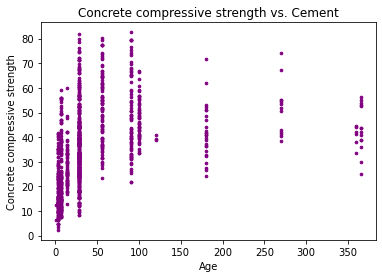

In [98]:
plt.scatter(conc['Age'], conc['Concrete compressive strength'], c='purple', s=7)
plt.title('Concrete compressive strength vs. Cement')
plt.xlabel('Age')
plt.ylabel('Concrete compressive strength')
;

''

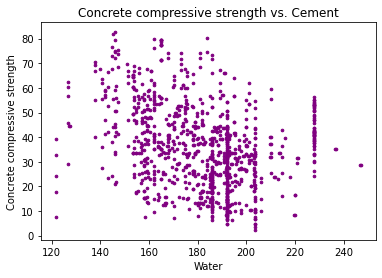

In [99]:
plt.scatter(conc['Water'], conc['Concrete compressive strength'], c='purple', s=7)
plt.title('Concrete compressive strength vs. Cement')
plt.xlabel('Water')
plt.ylabel('Concrete compressive strength')
;

Linear relationships can be appreciated in the plots, with positively correlated features "Cement" and "Superplasticizer" having a slight diagonal orientation that can be described as "up and to the right", whereas "Water" with its neggative correlation has a "down and to the right" general diagonal orientation. The linear relationship with Age is harder to visualize, the values for Age are probably not continuous.